In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cd = pd.read_csv("C:/Users/yingyinchu/Desktop/NCCU/ML/hw_data_ML/hw2&hw3/candy-data.csv",sep=",")

In [2]:
cd.tail()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [4]:
cd['winpercent']

0     66.971725
1     67.602936
2     32.261086
3     46.116505
4     52.341465
        ...    
80    45.466282
81    39.011898
82    44.375519
83    41.904308
84    49.524113
Name: winpercent, Length: 85, dtype: float64

In [5]:
# 建立新欄位 winpercent_new，winpercent>50者為1，<50者為0
cd.loc[ cd['winpercent'] >= 50, 'winpercent_new'] = 1

In [6]:
cd.loc[ cd['winpercent'] < 50, 'winpercent_new'] = 0

In [7]:
cd.iloc[:,12:]

,winpercent,winpercent_new
0,66.971725,1.0
1,67.602936,1.0
2,32.261086,0.0
3,46.116505,0.0
4,52.341465,1.0
...,...,...
80,45.466282,0.0
81,39.011898,0.0
82,44.375519,0.0
83,41.904308,0.0


In [18]:
cd[ ['winpercent_new'] ] = cd[ ['winpercent_new'] ].astype(int) # 轉成int Decision tree才可 work

In [19]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
 13  winpercent_new    85 non-null     int32  
dtypes: float64(3), int32(1), int64(9), object(1)
memory usage: 9.1+ KB


巧克力、水果、caramel

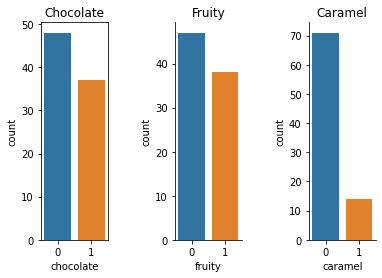

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)

sns.countplot(cd['chocolate'], ax = ax1)
ax1.set_title("Chocolate")

sns.despine(ax = ax2)   
sns.countplot(cd['fruity'], ax = ax2)
ax2.set_title("Fruity")

sns.despine(ax = ax3)   
sns.countplot(cd['caramel'], ax = ax3)
ax3.set_title("Caramel")

plt.subplots_adjust(wspace=1)
plt.show()

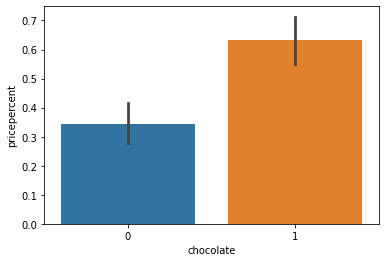

In [30]:
sns.barplot(cd['chocolate'], cd['pricepercent'])

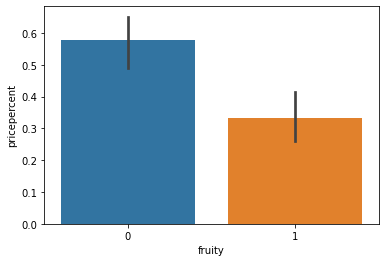

In [31]:
sns.barplot(cd['fruity'], cd['pricepercent'])

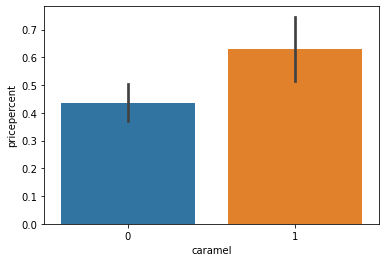

In [33]:
sns.barplot(cd['caramel'], cd['pricepercent'])

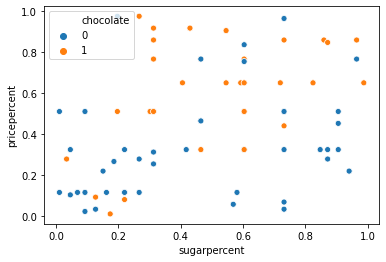

In [34]:
sns.scatterplot(cd['sugarpercent'],cd['pricepercent'], hue=cd['chocolate'])

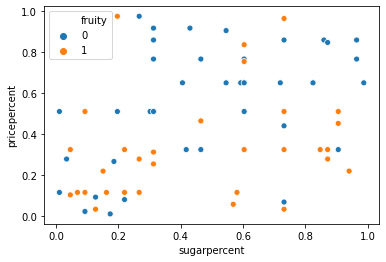

In [35]:
sns.scatterplot(cd['sugarpercent'],cd['pricepercent'], hue=cd['fruity'])

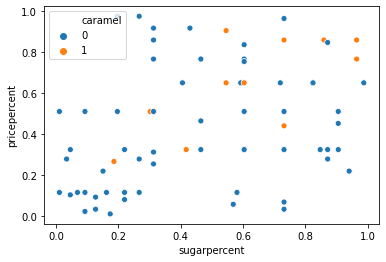

In [36]:
sns.scatterplot(cd['sugarpercent'],cd['pricepercent'], hue=cd['caramel'])

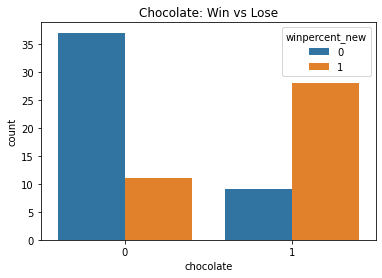

In [37]:
sns.countplot('chocolate', hue='winpercent_new', data=cd)
plt.title('Chocolate: Win vs Lose')
plt.show()

有巧克力成分的糖果獲勝機率較高

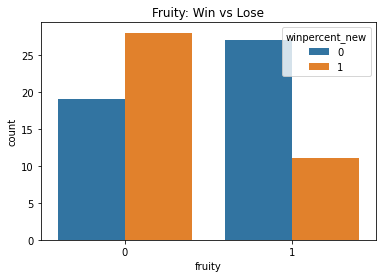

In [38]:
sns.countplot('fruity', hue='winpercent_new', data=cd)
plt.title('Fruity: Win vs Lose')
plt.show()

沒有水果成分的糖果獲勝機率較低

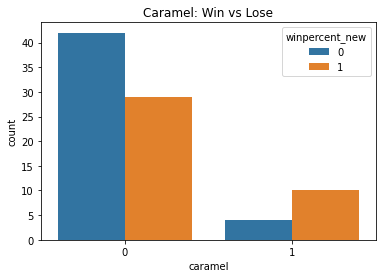

In [39]:
sns.countplot('caramel', hue='winpercent_new', data=cd)
plt.title('Caramel: Win vs Lose')
plt.show()

## data: candy-data.csv
### Q5-10
本題使用羅吉斯迴歸 (Logistic Regression)來做預測，數值不需再做label encoder直接使用即可。今天想透過：['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']這些資料來預測最後的winpercent結果，預測如果winpercent大等於50的話為1、小於50為0，以test_size=0.25, random_state=1，透過LogisticRegression預測最終結果（記得要做標準化）。

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cd[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']], cd['winpercent_new'], # x,y
                                                    test_size=0.25, 
                                                    random_state=1)

In [9]:
x_test.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
38,1,0,1,0,0,0,0,1,0,0.965,0.860
44,0,1,0,0,0,0,0,0,1,0.197,0.976
27,1,0,0,0,0,0,0,0,1,0.197,0.511
40,1,0,0,1,0,0,0,1,0,0.313,0.918
36,1,0,1,0,1,0,0,1,0,0.604,0.651


In [10]:
y_test.head()

38    1.0
44    0.0
27    1.0
40    1.0
36    1.0
Name: winpercent_new, dtype: float64

In [11]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression() 
model_2.fit(x_train, y_train)
pred = model_2.predict(x_test)

In [12]:
pred

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1.])

### Q5 請問「預測為0且真實為0」，以及「預測為1且真實為1」的數目為多少？

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, pred)
pd.DataFrame({'預測為0': cm[:,0], '預測為1': cm[:,1]}, index=['真實為0','真實為1']) 

,預測為0,預測為1
真實為0,9,2
真實為1,5,6


### Q6 請問預測精準度為何？

In [14]:
print(f'True Positive Rate(TPR): {round(cm[1][1]/(cm[1][1]+cm[1][0]), 4)}') # 6/(6+5)
print(f'False Negative Rate(FNR): {round(cm[1][0]/(cm[1][0]+cm[1][1]), 4)}') # 5/(5+6)
print(f'Accuracy: {(round( ((cm[0][0]+cm[1][1]) / (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])) , 4))}') # (9+6)/22

True Positive Rate(TPR): 0.5455
False Negative Rate(FNR): 0.4545
Accuracy: 0.6818


### Q7-10 請問AUC、準確率、召回率、F1-score

In [15]:
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': roc_auc_score(y_test, model_2.decision_function(x_test)), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred)}, index=['value'])

,Accuracy,AUC,Precision,Recall,F1
value,0.681818,0.743802,0.75,0.545455,0.631579


### Q12 knn
今天想知道candy-data.csv的預測結果績效，在n_neighbors為27的條件下，使用sklearn.metrics。請問精準度(accuracy), AUC, 準確率(precision), 召回率(recall), F1-score分別是多少呢？

In [43]:
from sklearn.preprocessing import StandardScaler
cd_train = cd[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']]
print(type(cd_train))
cd_scale_array = StandardScaler().fit_transform(cd_train)
print(type(cd_scale_array))

cd_scale = pd.DataFrame(data=cd_scale_array, columns=['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent'])
cd_scale.head()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1.138990,-0.899172,2.251983,-0.444053,-0.299572,3.338092,-0.46291,1.745743,-1.03594,0.901261,1.376914
1,1.138990,-0.899172,-0.444053,-0.444053,3.338092,-0.299572,-0.46291,1.745743,-1.03594,0.445922,0.148273
2,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,-1.242308
3,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,0.148273
4,-0.877971,1.112134,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,1.520236,0.148273


In [44]:
x_train, x_test, y_train, y_test = train_test_split(cd_scale, cd['winpercent_new'], # x,y
                                                    test_size=0.25, 
                                                    random_state=1)

In [45]:
from sklearn.neighbors import KNeighborsRegressor

model_k = KNeighborsRegressor(n_neighbors=27)
model_k.fit(x_train, y_train)
pred_k = model_k.predict(x_test)

In [54]:
result_df = pd.DataFrame({'actual_y':y_test,'pred_k':pred_k})
result_df.loc[ result_df['pred_k'] >= 0.5, 'pred'] = 1
result_df.loc[ result_df['pred_k'] < 0.5, 'pred'] = 0
result_df

,actual_y,pred_k,pred
38,1.0,0.703704,1.0
44,0.0,0.296296,0.0
27,1.0,0.370370,0.0
40,1.0,0.703704,1.0
36,1.0,0.629630,1.0
80,0.0,0.296296,0.0
58,0.0,0.296296,0.0
69,0.0,0.259259,0.0
84,0.0,0.629630,1.0
56,1.0,0.518519,1.0


In [52]:
pred = result_df['pred']

In [53]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score

fpr, tpr, thresholds = roc_curve(y_test, pred) # 由於KNN的model沒有decision_function()，不能使用roc_auc_score計算他的AUC，因此這邊換了一種AUC的計算方式
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred)}, index=['value'])

,Accuracy,AUC,Precision,Recall,F1
value,0.681818,0.681818,0.75,0.545455,0.631579


### Q14 decision tree -- y必須是binary (int形式的1跟0)
今天想知道candy-data.csv的預測結果績效，使用sklearn.metrics，請問在max_depth 為2跟7時精準度(accuracy)分別是多少呢？

In [35]:
from sklearn.tree import DecisionTreeClassifier

result = pd.DataFrame([])
depth = [2,7]

for i in depth:
    model_d = DecisionTreeClassifier(max_depth=i) # 裡面還有很多函數可以設定，這邊我們只先調整樹的深度。
    model_d.fit(x_train, y_train)
    pred = model_d.predict(x_test)

    cm = confusion_matrix(y_test, pred)         # 混淆矩陣
    fpr, tpr, thresholds = roc_curve(y_test, pred)    
    result = result.append(pd.DataFrame({'max_depth': i, 'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred), 'TPR': tpr[1], 'FNR': cm[1][0]/(cm[1][0]+cm[1][1])}, index=[i]), ignore_index=True)

result

,max_depth,Accuracy,AUC,Precision,Recall,F1,TPR,FNR
0,2,0.772727,0.772727,0.800,0.727273,0.761905,0.727273,0.272727
1,7,0.590909,0.590909,0.625,0.454545,0.526316,0.454545,0.545455
